# Sent.AI Core: Preprocessamento de Dados e EDA

## Configurações iniciais

In [1]:
# Importações de libraries importantes

import numpy as np
import pandas as pd
import tensorflow.keras as tf_keras
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Funções auxiliadoras

In [2]:
class Preprocessa:
    
    """
    Uma classe que contém métodos para pré-processar dados de texto.
    """

    def limpa_dados(self, string: str) -> str:
        """
        Limpa a string de entrada removendo caracteres não alfanuméricos e convertendo os
        caracteres restantes em minúsculas.

        Args:
            string (str): A string de entrada a ser limpa.

        Returns:
            str: A string limpa.

        Raises:
            TypeError: Se o tipo de dado de entrada não for uma string.
        """
        self.string = string

        if not isinstance(string, str):
            raise TypeError("O tipo do valor de entrada deveria ser string.")

        final_data = re.sub(r'[^a-zA-Z0-9\s]', '', string)
        final_data = final_data.lower()

        return final_data
    
    def remover_stopwords(self, df: pd.DataFrame, coluna: str) -> pd.DataFrame:
        
        """
        Remove as palavras irrelevantes (stopwords) da coluna especificada em um DataFrame.

        Args:
            df (pd.DataFrame): O DataFrame contendo os dados a serem pré-processados.
            coluna (str): A coluna do DataFrame que contém os dados a serem pré-processados.

        Returns:
            pd.DataFrame: O DataFrame com as stopwords removidas.

        """
        self.df = df
        self.coluna = coluna

        stopwords_ = set(stopwords.words('english'))

        df[coluna] = df[coluna].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_)]))

        return df
    
    def lematizar_texto(self, string: str) -> str:
        """
        Lematiza a string fornecida usando o lematizador WordNetLemmatizer da biblioteca NLTK.

        Args:
            string (str): A string a ser lematizada.

        Returns:
            str: A string lematizada.

        Raises:
            Nenhum.

        Exemplo:
            >>> texto = "Os gatos estão caçando ratos"
            >>> lematizador = Lematizador()
            >>> lematizador.lematizar_texto(texto)
            'O gato estar caçar rato '
        """

        self.string = string
        
        tokenizador = nltk.tokenize.WhitespaceTokenizer()
        lematizador = nltk.stem.WordNetLemmatizer()
        
        st = ""
        
        for word in tokenizador.tokenize(string):
            st = st + lematizador.lemmatize(word) + " "
        
        return st
        

## Carregamento de Dados

### 1. Dados de Recomendação Acionável

### Conjunto de Dados Wikihow

In [3]:
wikihow = pd.read_csv("../dados/raw/recommendation_datasets/wikihow_dataset.csv")

wikihow = pd.DataFrame(wikihow["text"].values, columns=["text"])

In [4]:
wikihow

,text
0,"If you're a photographer, keep all the necess..."
1,See the image for how this drawing develops s...
2,It is possible to become a VFX artist without...
3,The best art investors do their research on t...
4,"As you start planning for a project or work, ..."
...,...
215360,"If you have a name that you like, you might f..."
215361,Your name might sound great to you when you s...
215362,Relief printing is the oldest and most tradit...
215363,"Intaglio is Italian for ""incis­ing,"" and corr..."


In [5]:
# Palavras que o texto precisa incluir para ser selecionado
palavras_chave = ["strengthen", "refine", "enhance", 
                  "optimize", "upgrade", "expand", "simplify", 
                  "diversify", "customize", "adding",
                 "incorporating"]

In [6]:
# Seleção dos textos

wikihow['text'] = wikihow['text'].fillna('')
mask = wikihow['text'].str.contains('|'.join(palavras_chave))

wikihow = wikihow[mask]

In [7]:
wikihow["Label"] = 1

C:\Users\Kayky\AppData\Local\Temp\ipykernel_20132\4181343148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wikihow["Label"] = 1


In [8]:
wikihow

,text,Label
0,"If you're a photographer, keep all the necess...",1
3,The best art investors do their research on t...,1
4,"As you start planning for a project or work, ...",1
29,"Cleaning, feeding, grooming, exercising, and ...",1
33,You must always keep in mind that your pet ha...,1
...,...,...
215347,Know that focused practice will not always be...,1
215352,"Before doing anything else, stop and sum up y...",1
215358,The arts are about creativity and self-expres...,1
215359,You may have been called something other than...,1


### Conjunto de Dados Tripadvisor

In [9]:
# Carregando conjunto de dados
trip = pd.read_csv("../dados/raw/recommendation_datasets/tripadvisor_dataset.csv")
trip

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [10]:
# Filtrando conjunto de dados para não incluir as palavras chave

trip['Review'] = trip['Review'].fillna('')
mask2 = trip['Review'].str.contains('|'.join(palavras_chave))

trip = trip[~mask2]

In [11]:
trip = pd.DataFrame(trip["Review"].values, columns=["Review"])
trip

,Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso..."
...,...
18991,"best kept secret 3rd time staying charm, not 5..."
18992,great location price view hotel great quick pl...
18993,"ok just looks nice modern outside, desk staff ..."
18994,hotel theft ruined vacation hotel opened sept ...


In [12]:
trip["Label"] = 0

In [13]:
trip

,Review,Label
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0
...,...,...
18991,"best kept secret 3rd time staying charm, not 5...",0
18992,great location price view hotel great quick pl...,0
18993,"ok just looks nice modern outside, desk staff ...",0
18994,hotel theft ruined vacation hotel opened sept ...,0


In [14]:
# Renomeação de colunas

novos_nomes = {'Review': 'text'}
trip = trip.rename(columns=novos_nomes)

In [15]:
trip

,text,Label
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0
...,...,...
18991,"best kept secret 3rd time staying charm, not 5...",0
18992,great location price view hotel great quick pl...,0
18993,"ok just looks nice modern outside, desk staff ...",0
18994,hotel theft ruined vacation hotel opened sept ...,0


### Mergindo Conjuntos de Dados

In [16]:
# Concatena e reset o índice dos datasets

df = pd.concat([wikihow, trip])
df = df.reset_index()
df = df.iloc[:, 1:]

In [17]:
df

,text,Label
0,"If you're a photographer, keep all the necess...",1
1,The best art investors do their research on t...,1
2,"As you start planning for a project or work, ...",1
3,"Cleaning, feeding, grooming, exercising, and ...",1
4,You must always keep in mind that your pet ha...,1
...,...,...
43542,"best kept secret 3rd time staying charm, not 5...",0
43543,great location price view hotel great quick pl...,0
43544,"ok just looks nice modern outside, desk staff ...",0
43545,hotel theft ruined vacation hotel opened sept ...,0


### 2. Dados de Emoções

In [18]:
emotion = pd.read_csv("../dados/raw/emotions_datasets/training.csv")

In [19]:
emotion_map = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear'}

In [20]:
emotion

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


### 3. Dados de Sentimento Geral

In [21]:
general_sent = pd.read_csv("../dados/raw/general_sentiment_datasets/sentiment_dataset.csv", encoding="latin-1", header=None)

In [22]:
general_sent = general_sent.iloc[:, [0, 5]]

In [23]:
general_sent = general_sent.rename(columns={0: 'label', 5: 'text'})

In [24]:
general_sent

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [25]:
general_sent['label'] = general_sent['label'].replace([0, 2, 4], [-1, 0, 1])

In [26]:
general_sent

,label,text
0,-1,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,-1,is upset that he can't update his Facebook by ...
2,-1,@Kenichan I dived many times for the ball. Man...
3,-1,my whole body feels itchy and like its on fire
4,-1,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


## EDA: Análise Exploratória de Dados

### WordCloud:  Analisando as Palavras mais Frequentes | Dataset Recomendação Acionável

In [27]:
# Filtrando o dataset e criando sub-datasets com Label = 1 e Label = 0

label_1 = df.query("Label == 1")
label_0 = df.query("Label == 0")

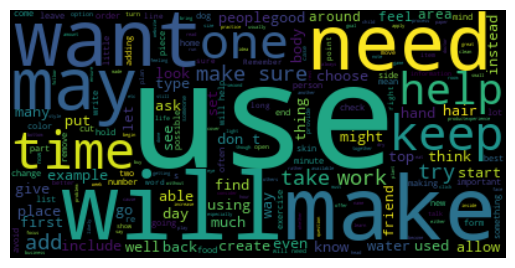

In [28]:
from wordcloud import WordCloud

# Transformando numa string única
label_1 = label_1["text"].values
label_0 = label_0["text"].values
label_1 = " ".join(label_1)
label_0 = " ".join(label_0)

# Mostrando a WordCloud
wordcloud_label_1 = WordCloud().generate(label_1)
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.axis("off")
plt.show()

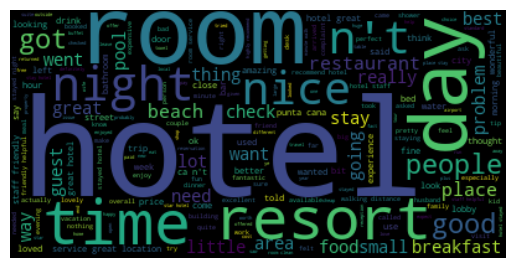

In [29]:
# Mostrando a WordCloud
wordcloud_label_0 = WordCloud().generate(label_0)
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.axis("off")
plt.show()

## Preprocessamento de Dados

### 1. Dados de Recomendação Acionável

In [30]:
df

,text,Label
0,"If you're a photographer, keep all the necess...",1
1,The best art investors do their research on t...,1
2,"As you start planning for a project or work, ...",1
3,"Cleaning, feeding, grooming, exercising, and ...",1
4,You must always keep in mind that your pet ha...,1
...,...,...
43542,"best kept secret 3rd time staying charm, not 5...",0
43543,great location price view hotel great quick pl...,0
43544,"ok just looks nice modern outside, desk staff ...",0
43545,hotel theft ruined vacation hotel opened sept ...,0


In [31]:
df['text'] = df['text'].apply(lambda texto: Preprocessa().limpa_dados(texto))

In [32]:
df

,text,Label
0,if youre a photographer keep all the necessar...,1
1,the best art investors do their research on t...,1
2,as you start planning for a project or work y...,1
3,cleaning feeding grooming exercising and ensu...,1
4,you must always keep in mind that your pet ha...,1
...,...,...
43542,best kept secret 3rd time staying charm not 5s...,0
43543,great location price view hotel great quick pl...,0
43544,ok just looks nice modern outside desk staff n...,0
43545,hotel theft ruined vacation hotel opened sept ...,0


In [33]:
df = Preprocessa().remover_stopwords(df, 'text')
df

,text,Label
0,youre photographer keep necessary lens cords b...,1
1,best art investors research pieces art buy som...,1
2,start planning project work youll likely gathe...,1
3,cleaning feeding grooming exercising ensuring ...,1
4,must always keep mind pet feelings like want f...,1
...,...,...
43542,best kept secret 3rd time staying charm 5star ...,0
43543,great location price view hotel great quick pl...,0
43544,ok looks nice modern outside desk staff nt par...,0
43545,hotel theft ruined vacation hotel opened sept ...,0


In [34]:
df['text'] = df['text'].apply(lambda texto: Preprocessa().lematizar_texto(texto))
df

,text,Label
0,youre photographer keep necessary lens cord ba...,1
1,best art investor research piece art buy someo...,1
2,start planning project work youll likely gathe...,1
3,cleaning feeding grooming exercising ensuring ...,1
4,must always keep mind pet feeling like want fr...,1
...,...,...
43542,best kept secret 3rd time staying charm 5star ...,0
43543,great location price view hotel great quick pl...,0
43544,ok look nice modern outside desk staff nt part...,0
43545,hotel theft ruined vacation hotel opened sept ...,0


In [35]:
texto_recomendacao = df['text'].to_numpy()
label_recomendacao = df['Label'].to_numpy()

In [36]:
# Tokenização das palavras

oov_token = '<OOV>'
tokenizador_recomendacao = Tokenizer(oov_token=oov_token)
tokenizador_recomendacao.fit_on_texts(texto_recomendacao)

In [37]:
print(f"A quantidade de tokens é: {len(tokenizador_recomendacao.word_counts)}")

A quantidade de tokens é: 239857


In [38]:
# Sequencias de texto
sequencia_recomendacao = tokenizador_recomendacao.texts_to_sequences(texto_recomendacao)

In [39]:
# Padding das sequencias
tamanho_frase = 1000
padded_recomendacao = pad_sequences(sequencia_recomendacao, maxlen=tamanho_frase, padding='post', truncating='post')

In [40]:
padded_recomendacao

array([[  17, 4288,   30, ...,    0,    0,    0],
       [  40,  792, 2558, ...,    0,    0,    0],
       [  47, 1146,  643, ...,    0,    0,    0],
       ...,
       [ 837,   29,   95, ...,    0,    0,    0],
       [  12, 6893, 7086, ...,    0,    0,    0],
       [  23,  846, 1337, ...,    0,    0,    0]])

### 2. Dados de Emoções